# Loan Eligibility Prediction

*Importing Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

*Loading DataSet for Training And Testing*

In [2]:
df_train = pd.read_csv('loan-train.csv')
df_test = pd.read_csv('loan-train.csv')
df = pd.concat([df_train, df_test],axis=0)
print(df_train.shape,df_test.shape)
df.head()

(614, 13) (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1228 non-null   object 
 1   Gender             1202 non-null   object 
 2   Married            1222 non-null   object 
 3   Dependents         1198 non-null   object 
 4   Education          1228 non-null   object 
 5   Self_Employed      1164 non-null   object 
 6   ApplicantIncome    1228 non-null   int64  
 7   CoapplicantIncome  1228 non-null   float64
 8   LoanAmount         1184 non-null   float64
 9   Loan_Amount_Term   1200 non-null   float64
 10  Credit_History     1128 non-null   float64
 11  Property_Area      1228 non-null   object 
 12  Loan_Status        1228 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 134.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,1228.0,5403.459283,6106.551744,150.0,2876.0,3812.5,5800.0,81000.0
CoapplicantIncome,1228.0,1621.245798,2925.055686,0.0,0.0,1188.5,2302.0,41667.0
LoanAmount,1184.0,146.412162,85.551144,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,1200.0,342.000000,65.093248,12.0,360.0,360.0,360.0,480.0
Credit_History,1128.0,0.842199,0.364716,0.0,1.0,1.0,1.0,1.0


# Data Preprocessing & EDA

In [5]:
cat_col = df.select_dtypes(include = ['object']).columns.to_list()

<Axes: >

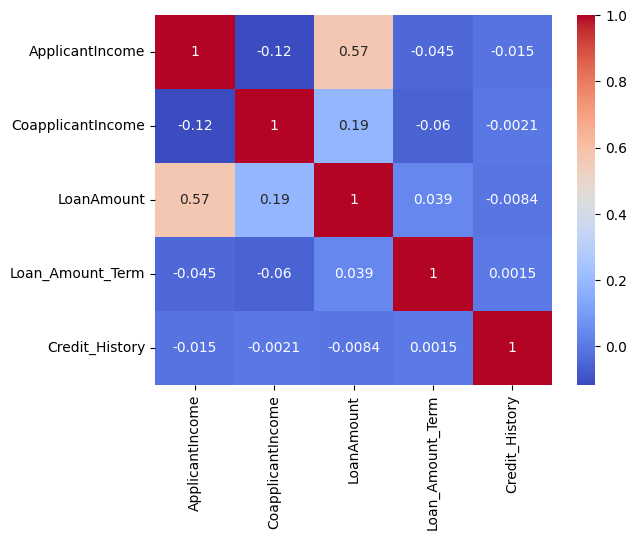

In [6]:
sns.heatmap((df_train.drop(cat_col,axis=1)).corr(),cmap='coolwarm',annot=True)

In [7]:
print(cat_col)
df.head()

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


*Converting Categorical into Numerical Values*

In [8]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [9]:
df['Married'] = df['Married'].map({'Yes':0,'No':1})

In [10]:
df['Education'] = df['Education'].map({'Graduate':0,'Not Graduate':1})

In [11]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':0,'No':1})

In [12]:
df['Property_Area'] = df['Property_Area'].map({'Urban':0,'Rural':1})

In [13]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':0,'N':1})

In [14]:
df['Dependents'].replace('3+',3,inplace=True)
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [15]:
df.drop('Loan_ID',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0,1.0,5849,0.0,NaN,360.0,1.0,0.0,0
1,0.0,0.0,1.0,0,1.0,4583,1508.0,128.0,360.0,1.0,1.0,1
2,0.0,0.0,0.0,0,0.0,3000,0.0,66.0,360.0,1.0,0.0,0
3,0.0,0.0,0.0,1,1.0,2583,2358.0,120.0,360.0,1.0,0.0,0
4,0.0,1.0,0.0,0,1.0,6000,0.0,141.0,360.0,1.0,0.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1202 non-null   float64
 1   Married            1222 non-null   float64
 2   Dependents         1198 non-null   float64
 3   Education          1228 non-null   int64  
 4   Self_Employed      1164 non-null   float64
 5   ApplicantIncome    1228 non-null   int64  
 6   CoapplicantIncome  1228 non-null   float64
 7   LoanAmount         1184 non-null   float64
 8   Loan_Amount_Term   1200 non-null   float64
 9   Credit_History     1128 non-null   float64
 10  Property_Area      762 non-null    float64
 11  Loan_Status        1228 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 124.7 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1202.0,0.186356,0.389556,0.0,0.0,0.0,0.0,1.0
Married,1222.0,0.348609,0.476725,0.0,0.0,0.0,1.0,1.0
Dependents,1198.0,0.762938,1.014792,0.0,0.0,0.0,2.0,3.0
Education,1228.0,0.218241,0.413220,0.0,0.0,0.0,0.0,1.0
Self_Employed,1164.0,0.859107,0.348061,0.0,1.0,1.0,1.0,1.0
ApplicantIncome,1228.0,5403.459283,6106.551744,150.0,2876.0,3812.5,5800.0,81000.0
CoapplicantIncome,1228.0,1621.245798,2925.055686,0.0,0.0,1188.5,2302.0,41667.0
LoanAmount,1184.0,146.412162,85.551144,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,1200.0,342.000000,65.093248,12.0,360.0,360.0,360.0,480.0
Credit_History,1128.0,0.842199,0.364716,0.0,1.0,1.0,1.0,1.0


In [18]:
df.isnull().sum()

Gender                26
Married                6
Dependents            30
Education              0
Self_Employed         64
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            44
Loan_Amount_Term      28
Credit_History       100
Property_Area        466
Loan_Status            0
dtype: int64

In [19]:
cat_col.remove('Loan_ID')
cat_col.append('Credit_History')
con_col = df.drop(cat_col,axis=1).columns.to_list()
cat_col.remove('Loan_Status')

*Dealing With Null Values*

In [22]:
def na_filler(df,cols,method):
    if method == 'mean':
      for c in cols:
          df[c].replace(np.nan,df[c].mean(),inplace=True)
      return print('Done')
    elif method == 'mode':
      for c in cols:
          df[c].replace(np.nan,df[c].mode()[0],inplace=True)
      return print('Done')
    elif method == 'median':
      for c in cols:
          df[c].replace(np.nan,df[c].median(),inplace=True)
      return print('Done')
    else:
        print("Can't Apply Any Method")
na_filler(df,con_col,'mean')
na_filler(df,cat_col,'mode')

Done
Done


In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1228 non-null   float64
 1   Married            1228 non-null   float64
 2   Dependents         1228 non-null   float64
 3   Education          1228 non-null   int64  
 4   Self_Employed      1228 non-null   float64
 5   ApplicantIncome    1228 non-null   int64  
 6   CoapplicantIncome  1228 non-null   float64
 7   LoanAmount         1228 non-null   float64
 8   Loan_Amount_Term   1228 non-null   float64
 9   Credit_History     1228 non-null   float64
 10  Property_Area      1228 non-null   float64
 11  Loan_Status        1228 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 124.7 KB


In [25]:
df.skew()

Gender               1.646777
Married              0.644061
Dependents           1.014308
Education            1.365948
Self_Employed       -2.157152
ApplicantIncome      6.531507
CoapplicantIncome    7.482360
LoanAmount           2.723263
Loan_Amount_Term    -2.386754
Credit_History      -2.019495
Property_Area        0.918544
Loan_Status          0.809006
dtype: float64

*Dealing With Outliers*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Dependents'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Self_Employed'),
  Text(5, 0, 'ApplicantIncome'),
  Text(6, 0, 'CoapplicantIncome'),
  Text(7, 0, 'LoanAmount'),
  Text(8, 0, 'Loan_Amount_Term'),
  Text(9, 0, 'Credit_History'),
  Text(10, 0, 'Property_Area'),
  Text(11, 0, 'Loan_Status')])

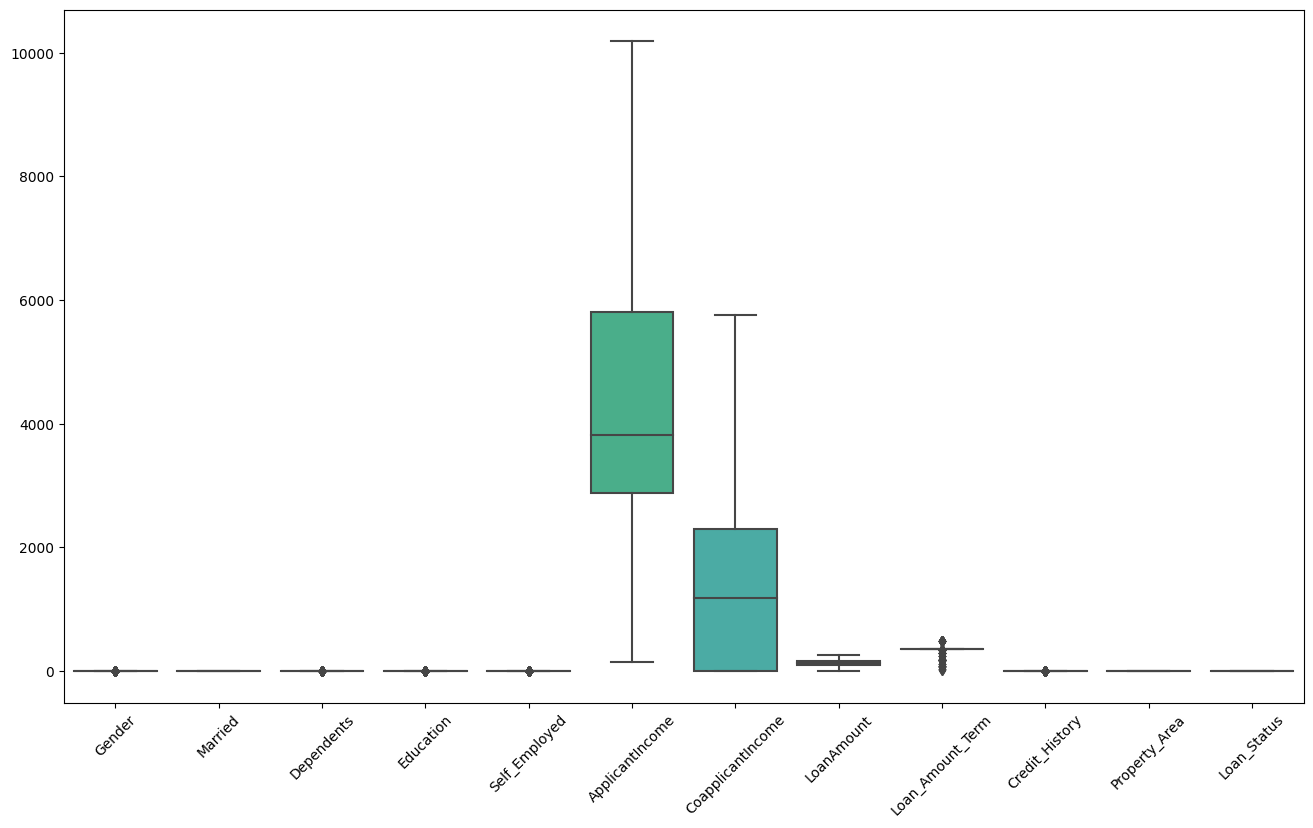

In [26]:
def replace_outliers(df,cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df[col] = np.where(df[col] > upper, upper, df[col])
        df[col] = np.where(df[col] < lower, lower, df[col])
    return df
df = replace_outliers(df,['ApplicantIncome','CoapplicantIncome','LoanAmount'])
plt.figure(figsize=(16,9))
sns.boxplot(df)
plt.xticks(rotation = 45)

## *Checking Correlation Between Variables And Features*

<Axes: >

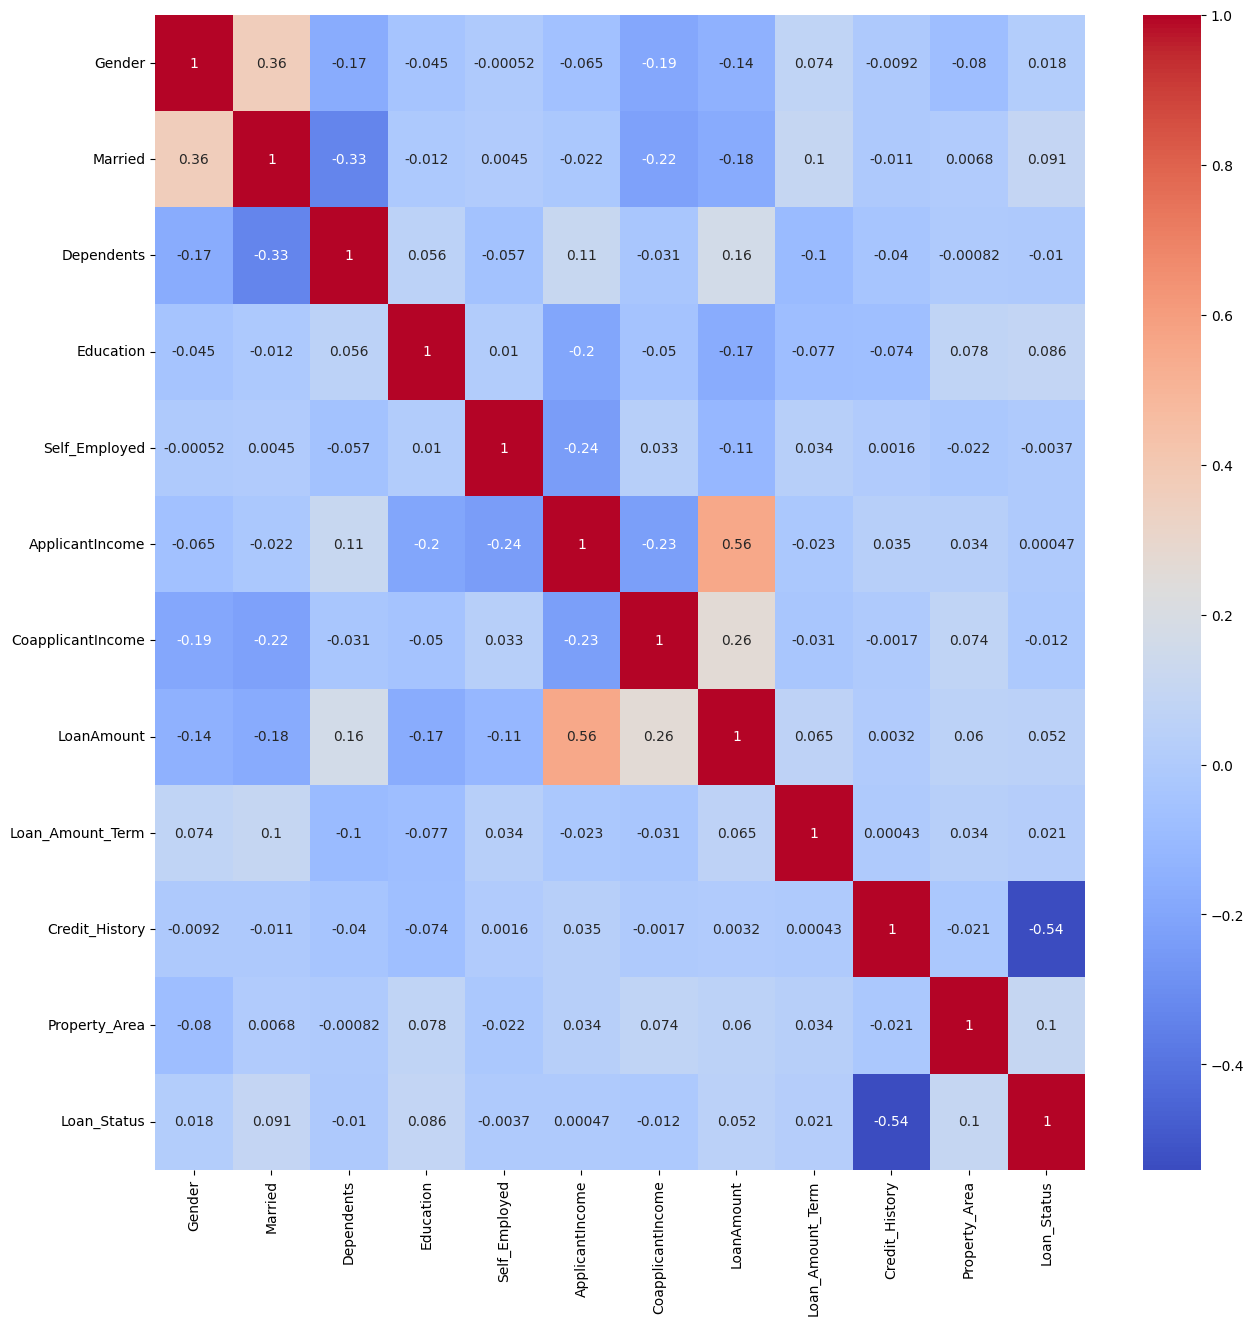

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# Insights
- There's Negative Correlation In Loan Status & Credit History
- Also Loan Amount Is related With The Applicant's Income

In [28]:
df_test = df.iloc[614:]
df_train = df.iloc[:614]
df_test.drop('Loan_Status',axis=1,inplace=True)

# Model Training

In [29]:
from sklearn.model_selection import train_test_split
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
predictions = Lr.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       164
           1       0.47      0.87      0.61        39

    accuracy                           0.79       203
   macro avg       0.72      0.82      0.73       203
weighted avg       0.87      0.79      0.81       203



*Hyperparameter Tuning*

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a LogisticRegression estimator
log_reg = LogisticRegression()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X,y)
grid_search.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [34]:
Lr = LogisticRegression(C=.1,penalty='l1',solver='liblinear')
Lr.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [35]:
from sklearn.metrics import classification_report
predictions = Lr.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       168
           1       0.46      0.94      0.62        35

    accuracy                           0.80       203
   macro avg       0.72      0.86      0.74       203
weighted avg       0.89      0.80      0.82       203



In [49]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier estimator
rfc = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X,y)
grid_search.best_score_

0.8111022257763562

In [54]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=5, min_samples_leaf=4, bootstrap=True)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=5)

In [39]:
prediction = rf.predict(X_test)

In [40]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       168
           1       0.46      0.94      0.62        35

    accuracy                           0.80       203
   macro avg       0.72      0.86      0.74       203
weighted avg       0.89      0.80      0.82       203



# Predictions Using Test Data

In [41]:
df_test['Pred_loan_Status'] = rf.predict(df_test)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_loan_Status
0,0.0,1.0,0.0,0,1.0,5849.0,0.0,146.412162,360.0,1.0,0.0,0
1,0.0,0.0,1.0,0,1.0,4583.0,1508.0,128.000000,360.0,1.0,1.0,0
2,0.0,0.0,0.0,0,0.0,3000.0,0.0,66.000000,360.0,1.0,0.0,0
3,0.0,0.0,0.0,1,1.0,2583.0,2358.0,120.000000,360.0,1.0,0.0,0
4,0.0,1.0,0.0,0,1.0,6000.0,0.0,141.000000,360.0,1.0,0.0,0
